<a href="https://colab.research.google.com/github/KURTHALLARES/KurtHallares/blob/main/laboratory_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import os as os
import numpy as np
import matplotlib as plt
import seaborn as sb
import warnings as wn






In [16]:
path="/content/drive/MyDrive/DATA SETS/loans.csv"
df=pd.read_csv(path)
df.head(5)


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [17]:
df.set_index('client_id', inplace=True)

<Axes: >

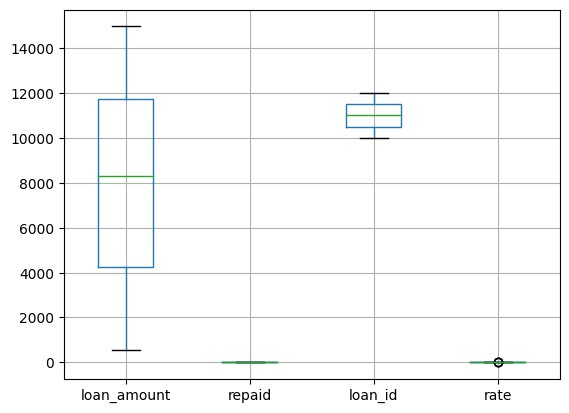

In [19]:
df.boxplot()


<Axes: >

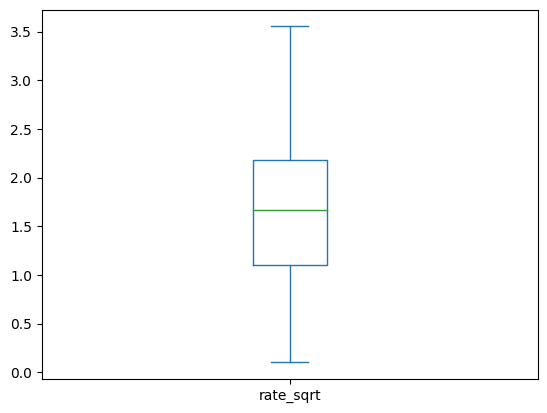

In [35]:
df['rate_sqrt'] = np.sqrt(df['rate'])
df['repaid_sqrt'] = np.sqrt(df['repaid'])

df['rate_sqrt'].plot(kind='box')





In [83]:
import pandas as pd

url = '/content/drive/MyDrive/DATA SETS/loans.csv'
data = pd.read_csv(url)

In [85]:
column_to_cap = 'rate'

<Axes: >

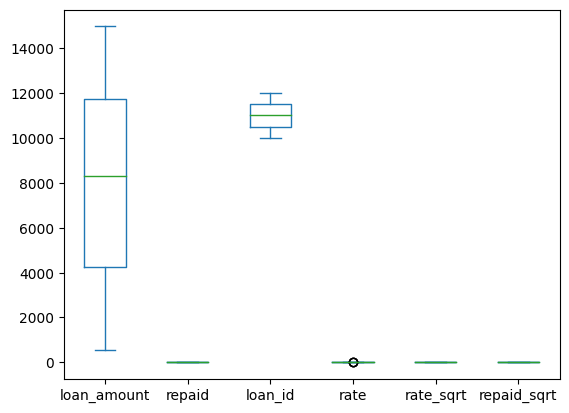

In [89]:
from scipy import stats
data['z_score'] = stats.zscore(data[column_to_cap])
threshold = 2


mean = data[column_to_cap].mean()
std_dev = data[column_to_cap].std()
data['z_score'] = (data[column_to_cap] - mean) / std_dev

df.plot(kind='box')

client_id        int64
loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object
Index(['client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_id',
       'loan_start', 'loan_end', 'rate'],
      dtype='object')
Skewness of Loan Amount: -0.039979264387749625
Kurtosis of Loan Amount: -1.231750031487528


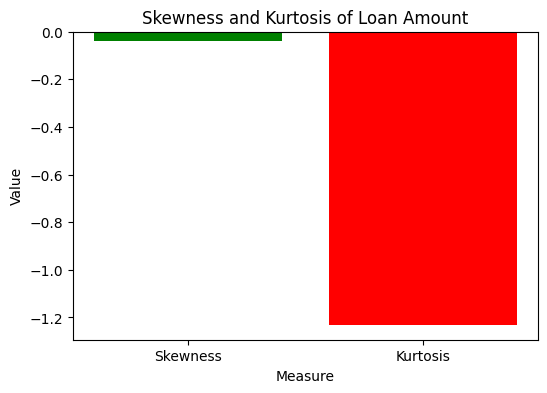

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/drive/MyDrive/DATA SETS/loans.csv')

print(data.dtypes)

numerical_columns = data.select_dtypes(include=np.number).columns

scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data.columns)
loan_amount_column = 'loan_amount'
loan_amount_skewness = skew(data[loan_amount_column])
loan_amount_kurtosis = kurtosis(data[loan_amount_column])

print("Skewness of Loan Amount:", loan_amount_skewness)
print("Kurtosis of Loan Amount:", loan_amount_kurtosis)


plt.figure(figsize=(6, 4))
plt.bar(['Skewness', 'Kurtosis'], [loan_amount_skewness, loan_amount_kurtosis], color=['green', 'red'])
plt.title('Skewness and Kurtosis of Loan Amount')
plt.xlabel('Measure')
plt.ylabel('Value')
plt.show()


In [40]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/DATA SETS/loans.csv')

categorical_columns = data.select_dtypes(include=['object']).columns

encoded_data = pd.get_dummies(data, columns=categorical_columns)

print(encoded_data.head())

   client_id  loan_amount  repaid  loan_id  rate  loan_type_cash  \
0      46109        13672       0    10243  2.15               0   
1      46109         9794       0    10984  1.25               0   
2      46109        12734       1    10990  0.68               0   
3      46109        12518       1    10596  1.24               1   
4      46109        14049       1    11415  3.13               0   

   loan_type_credit  loan_type_home  loan_type_other  loan_start_2000-01-26  \
0                 0               1                0                      0   
1                 1               0                0                      0   
2                 0               1                0                      0   
3                 0               0                0                      0   
4                 1               0                0                      0   

   ...  loan_end_2016-11-14  loan_end_2016-11-27  loan_end_2016-12-10  \
0  ...                    0                

In [61]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/DATA SETS/loans.csv')

data['loan_start'] = pd.to_datetime(data['loan_start'])
data['loan_end'] = pd.to_datetime(data['loan_end'])

data['loan_tenure'] = (data['loan_end'] - data['loan_start']).dt.days

print(data.head())

   client_id loan_type  loan_amount  repaid  loan_id loan_start   loan_end  \
0      46109      home        13672       0    10243 2002-04-16 2003-12-20   
1      46109    credit         9794       0    10984 2003-10-21 2005-07-17   
2      46109      home        12734       1    10990 2006-02-01 2007-07-05   
3      46109      cash        12518       1    10596 2010-12-08 2013-05-05   
4      46109    credit        14049       1    11415 2010-07-07 2012-05-21   

   rate  loan_tenure  
0  2.15          613  
1  1.25          635  
2  0.68          519  
3  1.24          879  
4  3.13          684  


In [59]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['loan_amount'])
y = data['loan_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (354, 8)
X_test shape: (89, 8)
y_train shape: (354,)
y_test shape: (89,)
